In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind,chi2_contingency

In [2]:
df=pd.read_csv('movies.csv', sep=",")

In [3]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [4]:
df_filtered = df[(df['Netflix'] == 1) | (df['Disney+'] == 1)]

In [5]:
df_filtered = df_filtered[['Title', 'Year', 'Age', 'Rotten Tomatoes', 'Netflix', 'Disney+']]

In [6]:
df_filtered.head()

,Title,Year,Age,Rotten Tomatoes,Netflix,Disney+
0,The Irishman,2019,18+,98/100,1,0
1,Dangal,2016,7+,97/100,1,0
2,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0
3,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0
4,Roma,2018,18+,94/100,1,0


In [7]:
df_disney = df_filtered[df_filtered['Disney+'] == 1]
df_netflix = df_filtered[df_filtered['Netflix'] == 1]

In [8]:
age_order = ['7+', '13+', '16+', '18+', 'all']

age_distribution_disney = df_disney['Age'].value_counts().reindex(age_order).fillna(0).astype(int)
age_distribution_netflix = df_netflix['Age'].value_counts().reindex(age_order).fillna(0).astype(int)

age_stats = df_filtered.groupby(['Disney+', 'Netflix'])['Age'].describe()

print("=== Age Distribution on Disney+ ===")
for age_group, count in age_distribution_disney.items():
    print(f"{age_group}: {count} movies")

print("\n=== Age Distribution on Netflix ===")
for age_group, count in age_distribution_netflix.items():
    print(f"{age_group}: {count} movies")

print("\n=== Age Restrictions Statistics by Platform Combination ===")
print(age_stats)

=== Age Distribution on Disney+ ===
7+: 278 movies
13+: 70 movies
16+: 4 movies
18+: 3 movies
all: 370 movies

=== Age Distribution on Netflix ===
7+: 322 movies
13+: 404 movies
16+: 151 movies
18+: 877 movies
all: 144 movies

=== Age Restrictions Statistics by Platform Combination ===
                count unique  top freq
Disney+ Netflix                       
0       1        1895      5  18+  877
1       0         722      5  all  369
        1           3      2   7+    2


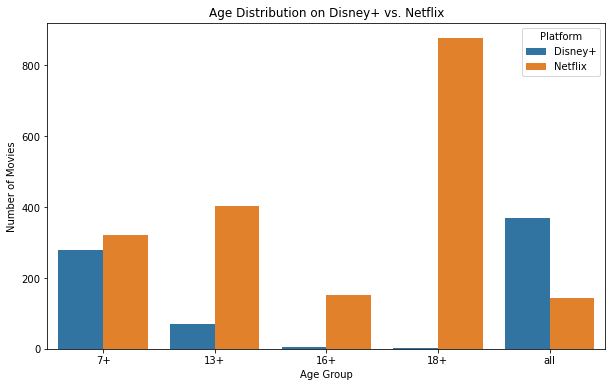

In [9]:
age_distribution_data = {
    'Age Group': age_order,
    'Disney+': age_distribution_disney.values,
    'Netflix': age_distribution_netflix.values
}

age_distribution_df = pd.DataFrame(age_distribution_data)

age_distribution_melted = age_distribution_df.melt(id_vars="Age Group", 
                                                   value_vars=["Disney+", "Netflix"], 
                                                   var_name="Platform", 
                                                   value_name="Number of Movies")

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Number of Movies', hue='Platform', data=age_distribution_melted)
plt.title('Age Distribution on Disney+ vs. Netflix')
plt.xlabel('Age Group')
plt.ylabel('Number of Movies')
plt.show()

In [11]:
df_disney['Rotten Tomatoes'] = df_disney['Rotten Tomatoes'].astype(str).str.split('/').str[0].astype(float)
df_netflix['Rotten Tomatoes'] = df_netflix['Rotten Tomatoes'].astype(str).str.split('/').str[0].astype(float)

df_filtered['Rotten Tomatoes'] = df_filtered['Rotten Tomatoes'].astype(str).str.split('/').str[0].astype(float)

print("Rotten Tomatoes Scores on Disney+:")
print(df_disney['Rotten Tomatoes'].describe())

print("\nRotten Tomatoes Scores on Netflix:")
print(df_netflix['Rotten Tomatoes'].describe())



Rotten Tomatoes Scores on Disney+:
count    922.000000
mean      58.312364
std       13.953313
min       10.000000
25%       48.000000
50%       57.500000
75%       67.750000
max       96.000000
Name: Rotten Tomatoes, dtype: float64

Rotten Tomatoes Scores on Netflix:
count    3688.000000
mean       54.447939
std        13.847615
min        10.000000
25%        45.000000
50%        53.000000
75%        63.000000
max        98.000000
Name: Rotten Tomatoes, dtype: float64


C:\Users\Lokesh\AppData\Local\Temp/ipykernel_21240/2692406000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disney['Rotten Tomatoes'] = df_disney['Rotten Tomatoes'].astype(str).str.split('/').str[0].astype(float)
C:\Users\Lokesh\AppData\Local\Temp/ipykernel_21240/2692406000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix['Rotten Tomatoes'] = df_netflix['Rotten Tomatoes'].astype(str).str.split('/').str[0].astype(float)


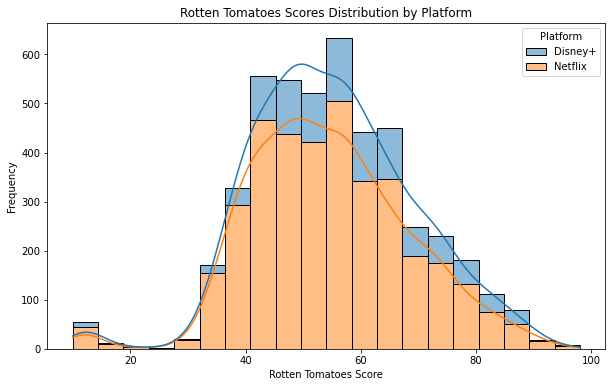

In [12]:
df_combined = pd.concat([
    df_disney[['Rotten Tomatoes']].assign(Platform='Disney+'),
    df_netflix[['Rotten Tomatoes']].assign(Platform='Netflix')
])

df_combined = df_combined.reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='Rotten Tomatoes', hue='Platform', kde=True, bins=20, multiple="stack")
plt.title('Rotten Tomatoes Scores Distribution by Platform')
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Frequency')
plt.show()

In [13]:
age_contingency_table = pd.crosstab(df_filtered['Age'], [df_filtered['Netflix'], df_filtered['Disney+']])
chi2_stat, p_value, dof, expected = chi2_contingency(age_contingency_table)
print("Chi-Square Test Results for Age Restrictions:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-Square Test Results for Age Restrictions:
Chi2 Statistic: 1030.601144927122
P-value: 3.701402558260122e-217


In [14]:
disney_scores = df_disney['Rotten Tomatoes'].dropna()
netflix_scores = df_netflix['Rotten Tomatoes'].dropna()
t_stat, p_value_rt = ttest_ind(disney_scores, netflix_scores)
print("\nT-Test for Rotten Tomatoes Scores:")
print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value_rt}")


T-Test for Rotten Tomatoes Scores:
T-Statistic: 7.567567531710881
P-value: 4.5645960458960904e-14
